In [2]:

import fastf1
import os

In [1]:


#this function is going to be used to check what platform I'm running this on so I dont have to put the data file on github
cache_path = r'./dataFileDesktop'
while False:
    # Create the cache directory if it doesn't exist
    if not os.path.exists(cache_path):
        os.makedirs(cache_path)

    if os.path.isfile(r'C:\Programming\SimplyLovelyF1\dataFileDesktop'):
        file = r'C:\Programming\SimplyLovelyF1\dataFileDesktop'
    else:
        print("not on your desktop bro")


In [2]:
import os
import fastf1
import pandas as pd
import time

# Set up cache path
cache_path = r'./dataFileDesktop'
if not os.path.exists(cache_path):
    os.makedirs(cache_path)

fastf1.Cache.enable_cache(cache_path)

# Years and sessions to include
years = [2023]
practice_sessions = ['FP1', 'FP2', 'FP3']
f1_2023_races = [
    'Brazil',            # Brazilian Grand Prix
    'Las Vegas',         # Las Vegas Grand Prix
    'Abu Dhabi'          # Abu Dhabi Grand Prix
]

all_laps = []

successful_races = set()
failed_races = set()

for year in years:
    try:
        schedule = fastf1.get_event_schedule(year, include_testing=False)
        for _, event in schedule.iterrows():
            location = event['EventName']
            if location not in f1_2023_races:
                print(f"⚠️ Skipping {location} as it's not in the 2023 race list")
                continue
            race_success = False
            for practice in practice_sessions:
                try:
                    session = fastf1.get_session(year, location, practice)
                    session.load()
                    laps = session.laps
                    if laps.empty:
                        print(f"No laps for {year} {location} {practice}")
                        continue

                    # Merge with weather data if available
                    if session.weather_data is not None and not session.weather_data.empty:
                        laps = laps.merge(session.weather_data, on='Time', how='left')
                    else:
                        laps['TrackTemperature'] = pd.NA
                        laps['Rainfall'] = pd.NA

                    # Add missing columns if not present
                    if 'TrackTemperature' not in laps.columns:
                        laps['TrackTemperature'] = pd.NA
                    if 'Rainfall' not in laps.columns:
                        laps['Rainfall'] = pd.NA

                    # Extract only necessary columns
                    subset = laps[['Driver', 'Team', 'LapNumber', 'LapTime',
                                   'TrackTemperature', 'Rainfall']].copy()
                    subset['Year'] = year
                    subset['Track'] = location

                    all_laps.append(subset)
                    print(f"✅ Added: {year} {location} {practice} - {len(subset)} laps")

                except Exception as e:
                    print(f"⚠️ Skipped {year} {location} {practice}: {e}")
                print("Sleeping for 5 seconds between API calls...")
                time.sleep(5) 
                if race_success:
                    successful_races.add(location)
        else:
            failed_races.add(location)
    except Exception as e:
        print(f"⚠️ Skipped year {year}: {e}")
        print("Sleeping for 5 seconds before next year...")
        time.sleep(5)  # 5 second delay between years

# Concatenate all collected lap data
if all_laps:
    df = pd.concat(all_laps, ignore_index=True)
    df = df[['Year', 'Track', 'Team', 'Driver', 'Rainfall', 'TrackTemperature', 'LapNumber', 'LapTime']]
    
    # Check if file exists and append if it does
    if os.path.exists('practice_laps_2020_2023.csv'):
        # Read existing data
        existing_df = pd.read_csv('practice_laps_2020_2023.csv')
        # Combine with new data
        combined_df = pd.concat([existing_df, df], ignore_index=True)
        # Remove any duplicates
        combined_df = combined_df.drop_duplicates()
        # Save the combined data
        combined_df.to_csv('practice_laps_2020_2023.csv', index=False)
        print("\n✅ Data appended to practice_laps_2020_2023.csv")
    else:
        # If file doesn't exist, create new file
        df.to_csv('practice_laps_2020_2023.csv', index=False)
        print("\n✅ New data saved to practice_laps_2020_2023.csv")
else:
    print("\n❌ No lap data was collected.")

# Print summary of successful and failed races
print("\n=== Data Collection Summary ===")
print(f"Successful races: {len(successful_races)}")
print(f"Failed races: {len(failed_races)}")
if failed_races:
    print("Failed races:", ", ".join(failed_races))

⚠️ Skipping Bahrain Grand Prix as it's not in the 2023 race list
⚠️ Skipping Saudi Arabian Grand Prix as it's not in the 2023 race list
⚠️ Skipping Australian Grand Prix as it's not in the 2023 race list
⚠️ Skipping Azerbaijan Grand Prix as it's not in the 2023 race list
⚠️ Skipping Miami Grand Prix as it's not in the 2023 race list
⚠️ Skipping Monaco Grand Prix as it's not in the 2023 race list
⚠️ Skipping Spanish Grand Prix as it's not in the 2023 race list
⚠️ Skipping Canadian Grand Prix as it's not in the 2023 race list
⚠️ Skipping Austrian Grand Prix as it's not in the 2023 race list
⚠️ Skipping British Grand Prix as it's not in the 2023 race list
⚠️ Skipping Hungarian Grand Prix as it's not in the 2023 race list
⚠️ Skipping Belgian Grand Prix as it's not in the 2023 race list
⚠️ Skipping Dutch Grand Prix as it's not in the 2023 race list
⚠️ Skipping Italian Grand Prix as it's not in the 2023 race list
⚠️ Skipping Singapore Grand Prix as it's not in the 2023 race list
⚠️ Skipping 

In [4]:
session = fastf1.get_session(2023, "Abu Dhabi", "FP1")
session.load()
print(f"{session.event.year} Season Round {session.event.round}: {session.event.name} - {session.name}")


core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 1 [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INF

2023 Season Round <bound method Series.round of RoundNumber                                                         22
Country                                                      Abu Dhabi
Location                                                    Yas Island
OfficialEventName    FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...
EventDate                                          2023-11-26 00:00:00
EventName                                         Abu Dhabi Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2023-11-24 13:30:00+04:00
Session1DateUtc                                    2023-11-24 09:30:00
Session2                                                    Practice 2
Session2Date                                 2023-11-24 17:00:00+04:00
Session2DateUtc                                    2023-11-24 13:00:00
Session3                     

In [4]:
import pandas as pd

file = "f1_lapData_2020-2025.csv"

df_raw = pd.read_csv(file)


In [6]:
df_raw["FP1 Lap Time"]


0                           NaN
1        0 days 00:01:37.766000
2                           NaN
3                           NaN
4        0 days 00:01:34.783000
                  ...          
65079                       NaN
65080                       NaN
65081                       NaN
65082                       NaN
65083                       NaN
Name: FP1 Lap Time, Length: 65084, dtype: object

In [3]:
import fastf1



# Load the race session
session = fastf1.get_session(2023, 'Monza', 'R')
session.load()

# Access the session results
results = session.results

# Get the winner (position 1)
winner = results.loc[results['Position'] == 1]

print(f"Winner: {winner['FullName'].values[0]} ({winner['TeamName'].values[0]})")
print(results['Position'])

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

Winner: Max Verstappen (Red Bull Racing)
1      1.0
11     2.0
55     3.0
16     4.0
63     5.0
44     6.0
23     7.0
4      8.0
14     9.0
77    10.0
40    11.0
81    12.0
2     13.0
24    14.0
10    15.0
18    16.0
27    17.0
20    18.0
31    19.0
22    20.0
Name: Position, dtype: float64


In [7]:
"""
Combine race and practice lap data files into a single file.

Parameters:
-----------
race_file : str, optional
    Path to the race laps CSV file. Defaults to 'f1_race_laps.csv'.
practice_file : str, optional
    Path to the practice laps CSV file. Defaults to 'f1_practice_laps.csv'.
output_file : str, optional
    Path to save the combined output file. Defaults to 'combined_laptimes.csv'.

Returns:
--------
str
    Path to the combined output file, or None if the operation failed
    """
import os
import fastf1
import pandas as pd
import time
import shutil
import numpy as np

race_file='f1_race_laps.csv' 
practice_file='f1_practice_laps.csv' 
output_file='combined_laptimes.csv'

try:
    # Check if input files exist
    if not os.path.exists(race_file):
        print(f"❌ Race file not found: {race_file}")
    if not os.path.exists(practice_file):
        print(f"❌ Practice file not found: {practice_file}")
    # Read the input files
    print(f"\nReading data from {race_file} and {practice_file}...")
    race_df = pd.read_csv(race_file)
    practice_df = pd.read_csv(practice_file)



    # Define the merge columns
    merge_columns = ['Year', 'Track', 'Driver', 'LapNumber']

    # Merge the DataFrames
    print("\nCombining data...")
    combined_df = pd.merge(
        race_df,
        practice_df,
        on=merge_columns,
        how='outer',
        suffixes=('_race', '_practice')
    )

    # Clean up duplicate columns
    for col in combined_df.columns:
        if col.endswith('_race') and col.replace('_race', '_practice') in combined_df.columns:
            # Keep the non-NA value from either column
            race_col = col
            practice_col = col.replace('_race', '_practice')
            combined_df[col.replace('_race', '')] = combined_df[race_col].combine_first(combined_df[practice_col])
            combined_df = combined_df.drop([race_col, practice_col], axis=1)

    # Define the final column order
    final_columns = [
        'Year', 'Track', 'Team', 'Driver', 'LapNumber',
        'FP1 Lap Time', 'FP2 Lap Time', 'FP3 Lap Time', 'Race Lap Time',
        'Position'
    ]

    # Ensure all columns exist
    for col in final_columns:
        if col not in combined_df.columns:
            combined_df[col] = pd.NA

    # Reorder columns
    combined_df = combined_df[final_columns]

    # Save the combined data
    combined_df.to_csv(output_file, index=False)
    print(f"\n✅ Combined data saved to {output_file}")
    
    # Print summary
    print("\n=== Data Summary ===")
    print(f"Total rows: {len(combined_df)}")
    print(f"Years covered: {combined_df['Year'].unique()}")
    print(f"Tracks covered: {len(combined_df['Track'].unique())}")
    print(f"Drivers covered: {len(combined_df['Driver'].unique())}")
    
    print(output_file)

except Exception as e:
    print(f"❌ Error combining lap data files: {str(e)}")
    import traceback
    print("\nFull error traceback:")
    print(traceback.format_exc())
    



Reading data from f1_race_laps.csv and f1_practice_laps.csv...

Combining data...

✅ Combined data saved to combined_laptimes.csv

=== Data Summary ===
Total rows: 27680
Years covered: [2024]
Tracks covered: 24
Drivers covered: 33
combined_laptimes.csv


In [1]:
import pandas as pd

file = r"f1_lapData_2020-2025.csv"

df = pd.read_csv(file)

df

,Year,Track,Team,Driver,LapNumber,FP1 Lap Time,FP2 Lap Time,FP3 Lap Time,Race Lap Time,Position
0,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,1.0,NaN,NaN,NaN,98.443,11.0
1,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,2.0,NaN,87.432,88.040,93.873,11.0
2,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,3.0,88.637,145.653,147.594,93.235,11.0
3,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,4.0,142.909,118.790,127.356,93.557,11.0
4,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,5.0,123.222,87.301,88.042,93.683,11.0
...,...,...,...,...,...,...,...,...,...,...
127815,2025,Saudi Arabian Grand Prix,Williams,SAI,46.0,NaN,NaN,NaN,93.536,8.0
127816,2025,Saudi Arabian Grand Prix,Williams,SAI,47.0,NaN,NaN,NaN,93.640,8.0
127817,2025,Saudi Arabian Grand Prix,Williams,SAI,48.0,NaN,NaN,NaN,93.591,8.0
127818,2025,Saudi Arabian Grand Prix,Williams,SAI,49.0,NaN,NaN,NaN,93.802,8.0


In [7]:
df["RaceDelta_FP2"] = df["Race Lap Time"]-df["FP2 Lap Time"]
df

,Year,Track,Team,Driver,LapNumber,FP1 Lap Time,FP2 Lap Time,FP3 Lap Time,Race Lap Time,Position,RaceDelta_FP2
0,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,1.0,NaN,NaN,NaN,98.443,11.0,NaN
1,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,2.0,NaN,87.432,88.040,93.873,11.0,6.441
2,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,3.0,88.637,145.653,147.594,93.235,11.0,-52.418
3,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,4.0,142.909,118.790,127.356,93.557,11.0,-25.233
4,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,5.0,123.222,87.301,88.042,93.683,11.0,6.382
...,...,...,...,...,...,...,...,...,...,...,...
127815,2025,Saudi Arabian Grand Prix,Williams,SAI,46.0,NaN,NaN,NaN,93.536,8.0,NaN
127816,2025,Saudi Arabian Grand Prix,Williams,SAI,47.0,NaN,NaN,NaN,93.640,8.0,NaN
127817,2025,Saudi Arabian Grand Prix,Williams,SAI,48.0,NaN,NaN,NaN,93.591,8.0,NaN
127818,2025,Saudi Arabian Grand Prix,Williams,SAI,49.0,NaN,NaN,NaN,93.802,8.0,NaN


In [9]:
df_fp = df.drop(["FP1 Lap Time", "RaceDelta_FP2"], axis=1)

In [12]:
df_fp
print (df_fp.columns.tolist())

['Year', 'Track', 'Team', 'Driver', 'LapNumber', 'FP2 Lap Time', 'FP3 Lap Time', 'Race Lap Time', 'Position']


In [13]:
id_cols = ['Year', 'Track', 'Team', 'Driver', 'Position']
value_cols = ['FP2 Lap Time', 'FP3 Lap Time', 'Race Lap Time']

In [14]:
top_rows = []
for col in value_cols:
    temp = df_fp.dropna(subset=[col])

    top = temp.groupby(id_cols, group_keys=False).apply(lambda g: g.nlargest(3, columns=col))

    top['source'] = col
    top_rows.append(top)

result = pd.concat(top_rows).reset_index(drop=True)

C:\Users\Sam\AppData\Local\Temp\ipykernel_2844\92409602.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top = temp.groupby(id_cols, group_keys=False).apply(lambda g: g.nlargest(3, columns=col))
C:\Users\Sam\AppData\Local\Temp\ipykernel_2844\92409602.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top = temp.groupby(id_cols, group_keys=False).apply(lambda g: g.nlargest(3, columns=col))
C:\Users\Sam\A

In [16]:
result

,Year,Track,Team,Driver,LapNumber,FP2 Lap Time,FP3 Lap Time,Race Lap Time,Position,source
0,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,9.0,147.187,NaN,93.844,11.0,FP2 Lap Time
1,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,3.0,145.653,147.594,93.235,11.0,FP2 Lap Time
2,2020,70th Anniversary Grand Prix,AlphaTauri,GAS,10.0,129.642,136.488,93.188,11.0,FP2 Lap Time
3,2020,70th Anniversary Grand Prix,AlphaTauri,KVY,11.0,132.549,87.754,93.594,10.0,FP2 Lap Time
4,2020,70th Anniversary Grand Prix,AlphaTauri,KVY,3.0,132.000,89.538,95.300,10.0,FP2 Lap Time
...,...,...,...,...,...,...,...,...,...,...
17037,2025,Saudi Arabian Grand Prix,Williams,ALB,23.0,127.415,NaN,113.604,9.0,Race Lap Time
17038,2025,Saudi Arabian Grand Prix,Williams,ALB,22.0,136.027,NaN,98.088,9.0,Race Lap Time
17039,2025,Saudi Arabian Grand Prix,Williams,SAI,1.0,NaN,NaN,133.455,8.0,Race Lap Time
17040,2025,Saudi Arabian Grand Prix,Williams,SAI,22.0,NaN,NaN,115.824,8.0,Race Lap Time


In [18]:
pip install xgboost scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   --- ------------------------------------ 12.8/150.0 MB 62.0 MB/s eta 0:00:03
   -------- ------------------------------- 30.9/150.0 MB 75.5 MB/s eta 0:00:02
   -------- ------------------------------- 33.6/150.0 MB 76.0 MB/s eta 0:00:02
   ----------- ---------------------------- 42.5/150.0 MB 51.9 MB/s eta 0:00:03
   --------------- ------------------------ 59.2/150.0 MB 58.1 MB/s eta 0:00:02
   ------------------- -------------------- 73.7/150.0 MB 59.5 MB/s eta 0:00:02
   --------------------- ------------------ 81.8/150.0 MB 56.1 MB/s eta 0:00:02
   ------------------------ --------------- 91.2/150.0 MB 56.0 MB/s eta 0:00:02
   -------------------------- ------------- 97.5/150.0 MB 52.3 MB/s eta 0:00:02
   ----------------------------- --------- 112.2/150.0 MB 54.3 MB/s eta 0:00:01
   ------------------------------- ------- 119.5/15


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
df_fp.columns.tolist()

['Year',
 'Track',
 'Team',
 'Driver',
 'LapNumber',
 'FP2 Lap Time',
 'FP3 Lap Time',
 'Race Lap Time',
 'Position',
 'FP2 Session Avg Lap Time_x',
 'FP3 Session Avg Lap Time_x',
 'FP2 Session Avg Lap Time_y',
 'FP3 Session Avg Lap Time_y',
 'FP2 Session Avg Lap Time',
 'FP3 Session Avg Lap Time',
 'FP2 Session Off Average',
 'FP3 Session Off Average']

y unique values: [11. 10.  8. 14.  7.  6.  4. 12. 16. 20. 17. 15.  9. 13.  3.  2.  5.  1.
 19. 18.]
Any NaNs in y? False
Any NaNs in X? False
RMSE: 5.498
R²: 0.009


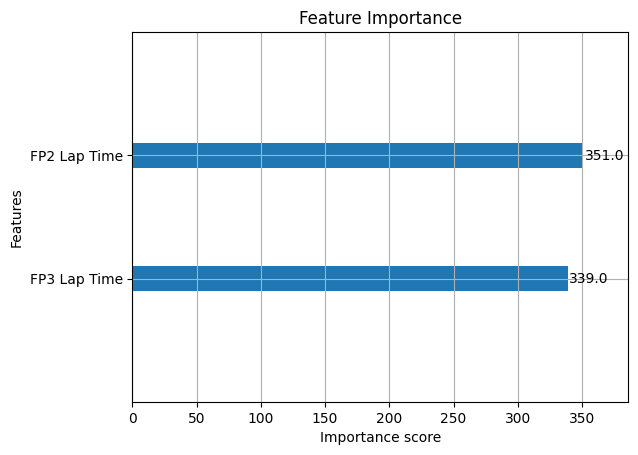

In [21]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import plot_importance

df_clean = df_fp.dropna(subset=['FP2 Lap Time', 'FP3 Lap Time'])
df_clean = df_clean.reset_index(drop=True)

# Ensure 'Position' is numeric
df_clean['Position'] = pd.to_numeric(df['Position'], errors='coerce')

# Drop rows where any input or target is invalid
df_clean = df[['FP2 Lap Time', 'FP3 Lap Time', 'Position']].copy()
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)  # remove infinite values
df_clean = df_clean.dropna(subset=['FP2 Lap Time', 'FP3 Lap Time', 'Position'])  # remove NaNs

X = df_clean[['FP2 Lap Time', 'FP3 Lap Time']]
y=df_clean['Position']

print("y unique values:", y.unique())
print("Any NaNs in y?", y.isna().any())
print("Any NaNs in X?", X.isna().any().any())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


plot_importance(model)
plt.title("Feature Importance")
plt.show()

In [27]:
# Copy original DataFrame to avoid modifying it directly
df_fp = df_fp.copy()

# FP2 average lap time per Year, Track, LapNumber
fp2_avg = df_fp.groupby(['Year', 'Track', 'LapNumber'])['FP2 Lap Time'].mean().reset_index()
fp2_avg = fp2_avg.rename(columns={'FP2 Lap Time': 'FP2 Session Avg Lap Time'})

# FP3 average lap time per Year, Track, LapNumber
fp3_avg = df_fp.groupby(['Year', 'Track', 'LapNumber'])['FP3 Lap Time'].mean().reset_index()
fp3_avg = fp3_avg.rename(columns={'FP3 Lap Time': 'FP3 Session Avg Lap Time'})

# Merge both session averages back into the original DataFrame
df_fp = df_fp.merge(fp2_avg, on=['Year', 'Track', 'LapNumber'], how='left')
df_fp = df_fp.merge(fp3_avg, on=['Year', 'Track', 'LapNumber'], how='left')

df_fp

MergeError: Passing 'suffixes' which cause duplicate columns {'FP2 Session Avg Lap Time_x'} is not allowed.

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import plot_importance

df_clean = df_fp.dropna(subset=['FP2 Lap Time', 'FP3 Lap Time'])
df_clean = df_clean.reset_index(drop=True)

# Ensure 'Position' is numeric
df_clean['Position'] = pd.to_numeric(df['Position'], errors='coerce')

# Drop rows where any input or target is invalid
df_clean = df[['FP2 Lap Time', 'FP3 Lap Time', 'Position']].copy()
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)  # remove infinite values
df_clean = df_clean.dropna(subset=['FP2 Lap Time', 'FP3 Lap Time', 'Position'])  # remove NaNs

X = df_clean[['FP2 Lap Time', 'FP3 Lap Time']]
y=df_clean['Position']

print("y unique values:", y.unique())
print("Any NaNs in y?", y.isna().any())
print("Any NaNs in X?", X.isna().any().any())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


plot_importance(model)
plt.title("Feature Importance")
plt.show()